<a href="https://colab.research.google.com/github/IgnacioAntonio82/APRENDIZAJE-AUTOM-TICO-1/blob/main/TP2-REGRESION%2BMLP_Aguilar_Ignacio/TP2_REGRESION%2BMLP_Aguilar_Ignacio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TP2 AA1

**Autor**: **Ignacio Antonio Aguilar**

## Indicaciones básicas

0) Debe usar este notebook como template para su entrega. Haga una copia y comience a completar las consignas.

1) Cada uno debe completar las consignas indicadas en este notebook.

2)
3) No pueden repetir el mismo dataset que ya haya definido un compañero.

4) copias explícitas de secciones enteras del trabajo de otro será penalizado disminuyendo su puntuación.

5) No se olvide de añadir las fuentes de inspiración de su código (blogs, prompts de chatgpt o similar).

6) Además de todo el código que agregue, es importante que sepa interpretarlo. Agregue texto explicativo en cada sección. Esto le ayudará al momento del coloquio / parcial

7) Revise las fecha límite de entrega de este trabajo

# ENTREGA

* En el foro destinado a la tarea debe postear al menos tres veces:
  - La primera vez para indicar el dataset elegido
  - Una segunda vez para postear su entrega
  - Una tercera vez para brindar feedback a alguien más en el foro.
  - Puede comentar más de un posteo de sus compañeros siempre y cuando el intercambio sea respetuoso y fructífero.
* Deben postear como solución un enlace a su notebook colab público y también un enlace al mismo notebook alojado en su repositorio GitHub.
* Debe sumar el enlace a un video donde muestre su solución y explique lo realizado. Duración máxima: 5 minutos. Puede grabarse a Ud. mismo usando una sesión de zoom y grabar localmente. Puede subir el video a su youtube personal como privado o Unlisted.
* Enlaces no accesibles o enlaces erróneos es igual a determinar que la tarea no ha sido entregada. Corrobore la viabilidad de los enlaces que postea.


#**Tarea: Aplicación de Regresión Lineal y Análisis de Importancia de Variables**  
**Objetivo**: Aplicar un modelo de regresión lineal a un dataset de su elección, evaluar su rendimiento e identificar las variables más relevantes para la predicción.

---

# **Instrucciones**:

#1. **Selección del Dataset**  
   - Elijan un dataset de UCI ML Repository del siguiente enlace: https://archive.ics.uci.edu/datasets/?Task=Regression&skip=0&take=10&sort=desc&orderBy=NumHits&search=  
   - Requisitos:  
     - Debe tener al menos 4 variables numéricas continuas (1 target, 3 o más features).  
     - Idealmente, que las features tengan distintas escalas o unidades ( no excluyente).
     - Revisar en el foro de la tarea que dicho dataset no haya sido ya elegido por otra persona.
     - Postee en el foro de la tarea el dataset que eligió. Continue al siguiente punto.  



## Resolución:

In [1]:
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler,RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

In [2]:
## el data set elegido es  Forty Soybean Cultivars from Subsequent Harvests

##cargo el data set
url="https://raw.githubusercontent.com/IgnacioAntonio82/APRENDIZAJE-AUTOM-TICO-1/main/TP2-REGRESION+MLP_Aguilar_Ignacio/data.csv"
df = pd.read_csv(url, sep=',', encoding='latin-1')
df.head(10)##Cargo el archivo csv y muestro los primeros 10 registros, para verificar si trae correctamente

,Season,Cultivar,Repetition,PH,IFP,NLP,NGP,NGL,NS,MHG,GY
0,1,NEO 760 CE,1,58.80,15.20,98.2,177.80,1.81,5.20,152.20,3232.82
1,1,NEO 760 CE,2,58.60,13.40,102.0,195.00,1.85,7.20,141.69,3517.36
2,1,NEO 760 CE,3,63.40,17.20,100.4,203.00,2.02,6.80,148.81,3391.46
3,1,NEO 760 CE,4,60.27,15.27,100.2,191.93,1.89,6.40,148.50,3312.58
4,1,MANU IPRO,1,81.20,18.00,98.8,173.00,1.75,7.40,145.59,3230.99
5,1,MANU IPRO,2,75.80,20.80,69.2,128.00,1.85,7.20,154.87,3374.80
6,1,MANU IPRO,3,84.40,15.80,95.4,161.80,1.70,6.80,150.23,3182.76
7,1,MANU IPRO,4,80.47,18.20,87.8,154.27,1.77,7.13,149.90,3165.72
8,1,77HO111I2X - GUAPORÃ,1,52.20,14.40,64.8,148.80,2.30,7.20,180.25,3640.46
9,1,77HO111I2X - GUAPORÃ,2,55.80,15.80,72.0,188.80,2.62,6.20,176.75,3602.34


##Explicacion Significado de Features
- Season → Campaña agrícola / año.

- Cultivar → Genotipo / variedad / híbrido.

- Repetition → Número de la repetición (bloque experimental).

- PH → Altura de planta (cm).

- IFP → Inserción de la primera vaina (cm).

- NLP → Número de vainas por planta.

- NGP → Número de granos por planta.

- NGL → Número de granos por vaina (o lóculo).

- NS → Número de semillas por vaina / nodo (según definición en tu protocolo).

- MHG → Peso de 100 semillas (g).

- GY → Rendimiento en grano (kg/ha, probablemente).


## 2. **Análisis exploratorio (previo al modelado)**  
   - Describan las variables (media, distribución, outliers).  
   - Visualizen:  
     - Histogramas o boxplots para ver distribuciones.  
     - Gráficos de dispersión (scatterplots) entre features y target.  
   - **Pregunta clave**: ¿Qué relaciones lineales preliminares observan?  


## Resolución:

In [3]:
# 1. Estadísticas descriptivas
df.describe()


,Season,Repetition,PH,IFP,NLP,NGP,NGL,NS,MHG,GY
count,320.000000,320.000000,320.000000,320.0000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000
mean,1.500000,2.500000,68.386781,15.4650,59.088313,135.085844,2.290844,4.071656,168.322313,3418.553794
std,0.500783,1.119785,8.958194,3.0243,20.068187,60.494529,0.840116,1.474531,19.625566,503.003602
min,1.000000,1.000000,47.600000,7.2000,20.200000,47.800000,0.940000,0.400000,127.060000,1538.230000
25%,1.000000,1.750000,62.950000,13.6000,44.350000,95.052500,2.000000,3.000000,153.845000,3126.611552
50%,1.500000,2.500000,67.200000,15.6000,54.500000,123.000000,2.280000,3.800000,166.150000,3397.276724
75%,2.000000,3.250000,74.347500,17.3300,71.220000,161.350000,2.480000,5.000000,183.182500,3708.262931
max,2.000000,4.000000,94.800000,26.4000,123.000000,683.400000,14.860000,9.000000,216.000000,4930.000000


##Interpretacion de cada variable
- count: Hay 320 observaciones
### PH (Plant Height = Altura de planta, cm)

- Media = 68.4 cm,
- Rango = 47.6 – 94.8 cm.
- 25% < 63 cm, la mayoría de las plantas no supera los 75 cm.
- Variabilidad moderada (std 8.96), es decir, no hay diferencias extremas en altura.

###IFP (Inflorescence Primary, cm / largo de inflorescencia primaria)

- Media = 15.5 cm, rango 7.2 – 26.4 cm.
- Valores entre 13.6 y 17.3 cm (25–75%) son lo más frecuente.
- Variabilidad moderada (std 3.02).

###NLP (Número de lóculos por planta / vainas por planta, según el cultivo)

- Media = 59.1, rango 20.2 – 123.
- El 50% de los casos cae entre 44 y 71.
- Desviación relativamente alta (std 20.1)

### NGP (Número de granos por planta)

- Media = 135, pero el máximo llega a 683.4, lo que es un outlier fuerte.
- El 50% central está entre 95 y 161, valores más razonables.
- La dispersión (std 60.5) es muy alta.

### NGL (Número de granos por lóculo / vaina)

- Media = 2.29, rango 0.94 – 14.86.
- La mayoría de los datos se concentran entre 2 y 2.5 (percentiles 25–75).
- El máximo (14.86) parece un valor atípico o error de medición

### NS (Número de semillas por espiga o similar)

- Media = 4.07, rango 0.4 – 9.
- 50% central entre 3 y 5, lo cual muestra baja dispersión.
- Valores mínimos (0.4) indican plantas muy poco productivas.

### MHG (Mil Hojas de Grano o Peso de 1000 granos, g)

- Media = 168.3 g, rango 127 – 216 g.
- La mayoría entre 154 y 183 g (percentiles 25–75).
- Variabilidad moderada (std 19.6).

### GY (Grain Yield = rendimiento de grano, kg/ha o g/planta según diseño)

- Media = 3419, rango 1538 – 4930.
- 50% central entre 3126 y 3708, lo que indica una productividad media-alta.
- Desviación (503) muestra que hay diferencias importantes.









In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Season      320 non-null    int64  
 1   Cultivar    320 non-null    object 
 2   Repetition  320 non-null    int64  
 3   PH          320 non-null    float64
 4   IFP         320 non-null    float64
 5   NLP         320 non-null    float64
 6   NGP         320 non-null    float64
 7   NGL         320 non-null    float64
 8   NS          320 non-null    float64
 9   MHG         320 non-null    float64
 10  GY          320 non-null    float64
dtypes: float64(8), int64(2), object(1)
memory usage: 27.6+ KB


In [5]:
df.shape

(320, 11)

In [6]:
# Identificar variables categóricas por tipo de dato (object, category)
categorical_vars = df.select_dtypes(include=["object", "category"]).columns.tolist()
categorical_vars

['Cultivar']

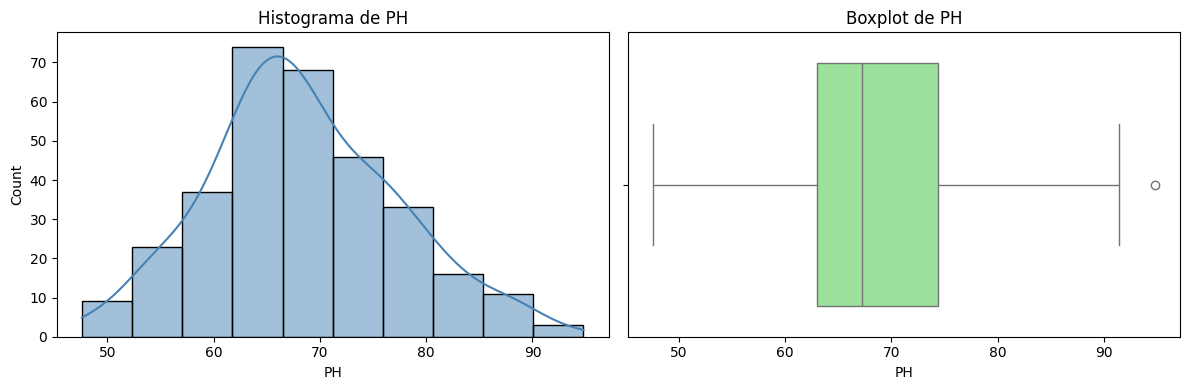

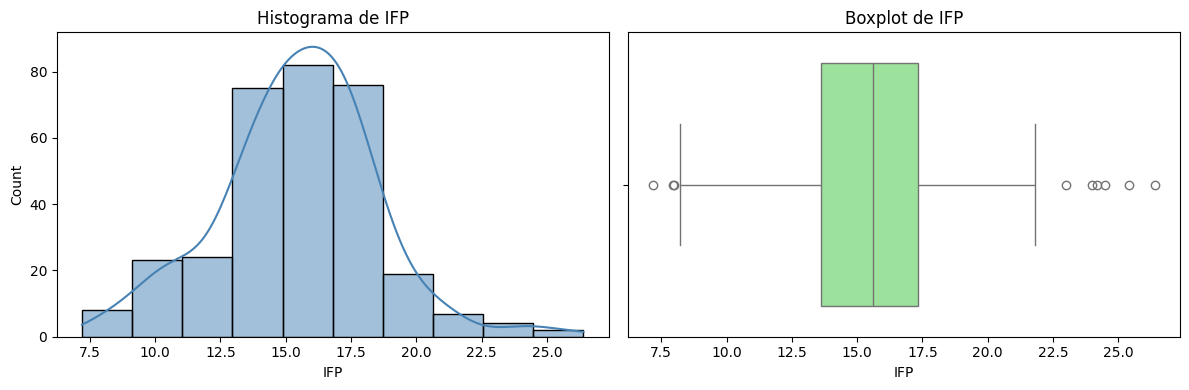

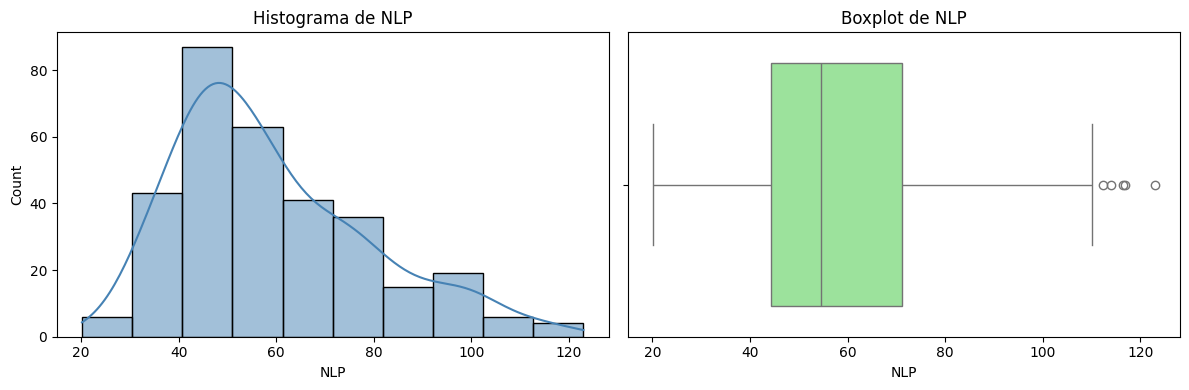

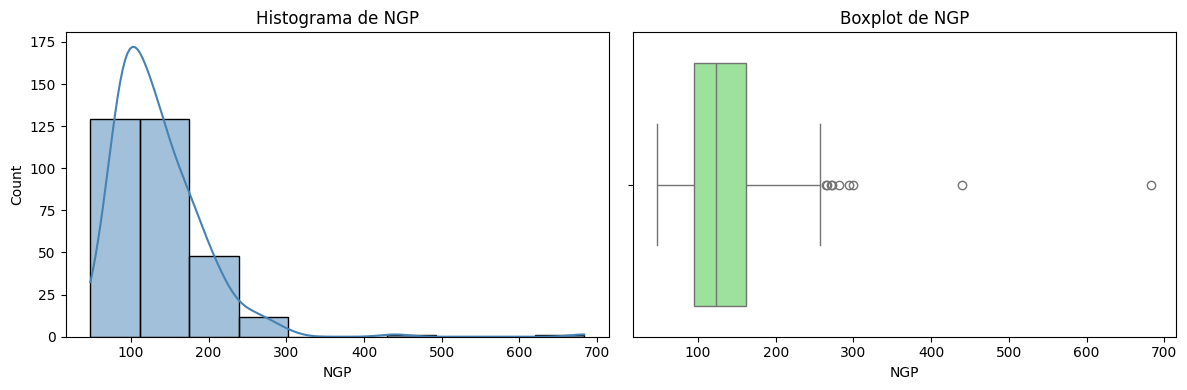

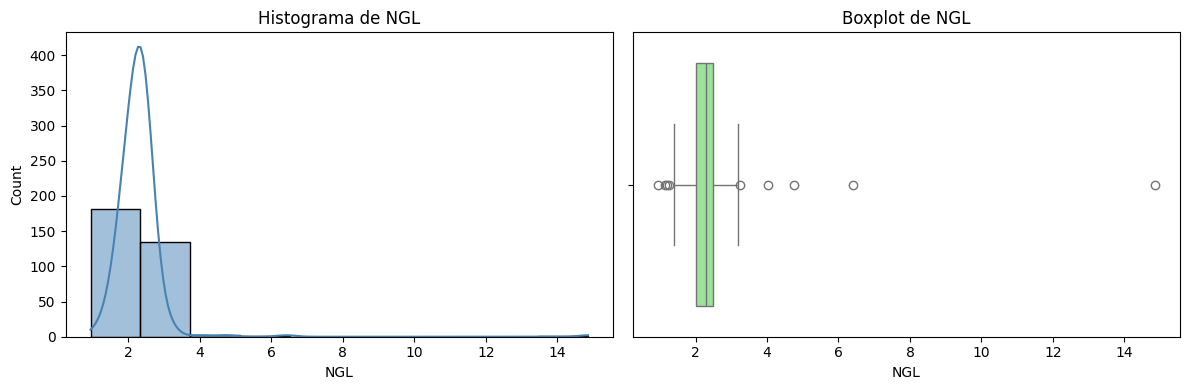

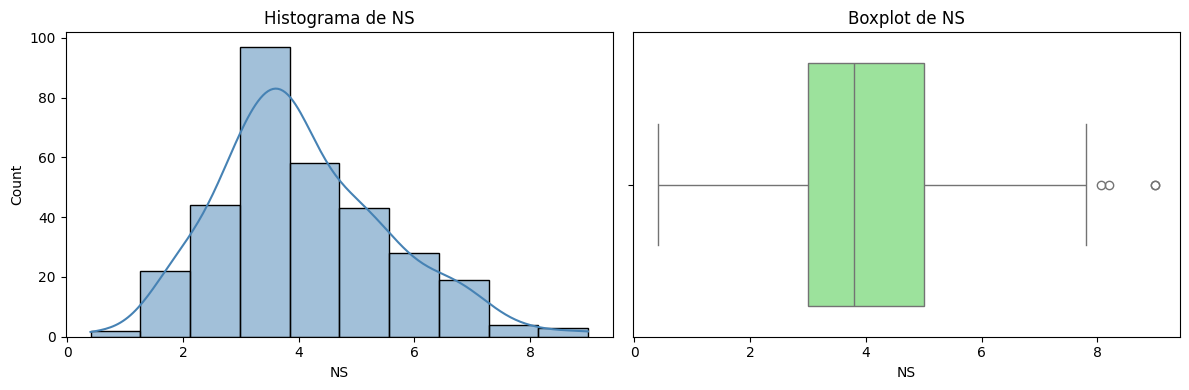

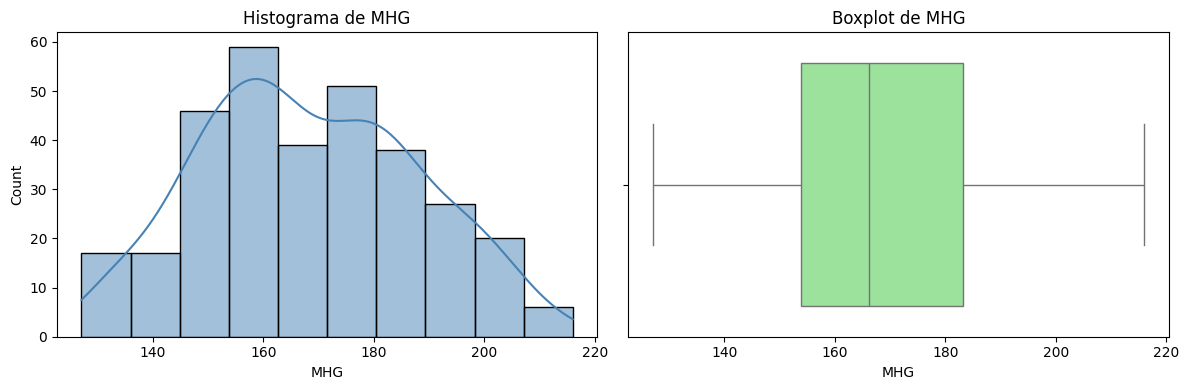

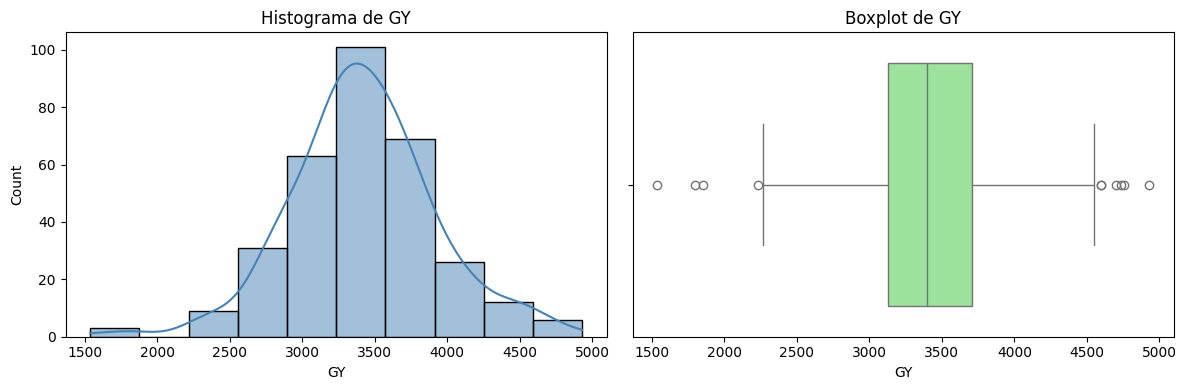

In [7]:
## Histogramas o boxplots para ver distribuciones

features = ["PH", "IFP", "NLP", "NGP", "NGL", "NS", "MHG", "GY"]
# Define las variables que querés analizar.

for col in features:
    plt.figure(figsize=(12,4)) #Crea una nueva figura (gráfico) de 12x4 pulgadas para cada variable.

    # Histograma
    plt.subplot(1,2,1) #Divide la figura en una cuadrícula de subgráficos
    sns.histplot(df[col], kde=True, bins=10, color="steelblue")
    # Genera un histograma de la columna col del DataFrame df:
    # bins=10 → divide los valores en 10 intervalos (barras).
    #color="steelblue" → pinta las barras de azul acero.
    # kde=True → añade la curva de densidad estimada para ver cómo se distribuyen los datos suavemente
    plt.title(f"Histograma de {col}")
    #Le pone un título dinámico al gráfico

    # Boxplot
    plt.subplot(1,2,2)
    sns.boxplot(x=df[col], color="lightgreen")
    plt.title(f"Boxplot de {col}")

    plt.tight_layout()
    plt.show()

### Interpretacion Histograma / Boxplot de Algunos graficos

## histograma y un boxplot de la variable PH (Plant Height = Altura de planta)
## Histograma
- curva aproximadamente normal
- es bastante simétrica
## Boxplot
- Outlier: aparece un valor aislado cerca de 95 cm
- Bigotes (mín–máx sin outliers): se extienden desde ~48 cm hasta ~92 cm
- Mediana: está alrededor de 67 cm
- Caja (IQR: 25%–75%): se concentra entre 63 y 74 cm

## histograma y un boxplot de IFP (longitud de inflorescencia primaria, en cm)
## Histograma
- Forma: distribución cercana a la normal
## Boxplot
- Outliers:
- - En el extremo bajo: valores cercanos a 7.5–8 cm, plantas con inflorescencias muy cortas.
- - En el extremo alto: varios puntos aislados por encima de 22 cm, llegando hasta ~26 cm
- Bigotes (sin outliers): van de ~10 a ~21 cm.
- Caja (IQR): concentra el 50% de los datos entre 13.6 y 17.3 cm, lo que indica que la mayoría está bien agrupada.

# histograma y un boxplot de  NLP (Número de lóculos/vainas por planta):
## Histograma
- Distribución: asimétrica hacia la derecha
## Boxplot
- Outliers: aparecen varios puntos aislados en el extremo alto (≥115)
- Bigotes (sin outliers): se extienden hasta valores cercanos a 110 vainas
- Caja (IQR): entre 44 y 71 vainas, abarca el 50% de los datos centrales

# histograma y un boxplot de NGP (Número de granos por planta):
## Histograma
- Distribución: La distribución es asimétrica positiva (sesgada a la derecha)

## Boxplot
- Outliers: aparecen múltiples puntos extremos
- Bigotes (sin outliers): se extienden hasta valores cercanos a 250–280.
- Caja (IQR): entre ~95 y 160 granos, donde se ubica el 50% de los datos.

# histograma y un boxplot de  NGL (Número de granos por lóculo / vaina):
## Histograma
- Distribución: La distribución es asimétrica positiva

## Boxplot
- El cajón verde muestra que el rango intercuartílico (IQR) va aproximadamente entre 2 y 3.
- La mediana está cerca de 2,5.
- Existen outliers a la derecha: valores de 4, 6 y un caso extremo alrededor de 15.
- También se observan algunos outliers menores en la parte baja, aunque pocos.





In [8]:
# 3. Scatterplots de features vs target
# -------------------------
# Scatterplots vs Rendimiento (GY)
# -------------------------
# Scatterplots interactivos
for col in features:  #Recorre todas las columnas listadas en features, excepto la variable GY (porque esa ya se usa como variable de salida en el eje y).
    if col != "GY":
        fig = px.scatter(  #Crea un diagrama de dispersión
            df,
            x=col, #el eje X será la variable independiente
            y="GY", #el eje Y siempre será el rendimiento
            color="Cultivar",   # los puntos se colorean según la categoría de Cultivar (esto ayuda a comparar grupos).
            title=f"{col} vs Rendimiento (GY)", #título dinámico con el nombre de la variable
            template="plotly_white", # estilo limpio con fondo blanco
            trendline="ols",          # Línea de regresión
            trendline_scope="overall",# dibuja una sola línea de tendencia global usando todos los cultivares juntos.
            hover_data=df.columns  # para que muestre más info al pasar el mouse
        )
        fig.show()



Pregunta clave: ¿Qué relaciones lineales preliminares observan?

El rendimiento en grano (GY) muestra asociaciones positivas principalmente con el número de granos por planta (NGP) y el número de legumbres por planta (NLP), aunque dichas correlaciones no son muy fuertes. Esto sugiere que el rendimiento no depende de una sola característica, sino que responde a la combinación de múltiples factores, por lo que un análisis multivariado resultará más adecuado para explicar su variabilidad.



## 3. **Preprocesamiento**  
   - Limpieza: Manejen missing values (eliminar, imputar) y outliers (si es necesario).  
   - Limpieza: indique cuáles features descarta. Justifique.
   - Indique si usará o no variables categóricas. Justifique. Realice su preprocesamiento adeucado.
   - Escalen las features (p.ej., StandardScaler) para comparar coeficientes después.  
   - Dividan en train/test (70-30 o 80-20).  

## Resolución:

In [9]:
# --- 1. Detectar valores faltantes ---
print("Valores faltantes por columna:")

missing_values = df.isnull().sum()

# 2. Detectar outliers usando el criterio IQR en las variables numéricas
outlier_info = {}
for col in ["PH","IFP","NLP","NGP","NGL","NS","MHG","GY"]:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
    outlier_info[col] = len(outliers)

missing_values, outlier_info



Valores faltantes por columna:


(Season        0
 Cultivar      0
 Repetition    0
 PH            0
 IFP           0
 NLP           0
 NGP           0
 NGL           0
 NS            0
 MHG           0
 GY            0
 dtype: int64,
 {'PH': 1,
  'IFP': 9,
  'NLP': 5,
  'NGP': 9,
  'NGL': 9,
  'NS': 4,
  'MHG': 0,
  'GY': 10})

Resultado: No hay valores nulos, lo que facilita el análisis.
###Respecto a los outliers
- PH (Altura de planta): 1 outlier.
- IFP (Índice de fecundidad por planta): 9 outliers.
- NLP (Nº de legumbres por planta): 5 outliers.
- NGP (Nº de granos por planta): 9 outliers.
- NGL (Nº de granos por legumbre): 9 outliers.
- NS (Nº de semillas por legumbre): 4 outliers.
- GY (Rendimiento en grano): 10 outliers.
- MHG (Masa de 100 granos): sin outliers detectados.
###No parecen ser errores de carga, Conviene no eliminarlos

In [10]:
#Limpieza: indique cuáles features descarta. Justifique.

#Las features a descartar son:
#Repetition: No aporta a la predicción
#Season: no voy a realizar un analisis por año.

## elimino los features a descartar
df_clean = df.drop(columns=["Repetition", "Season"])
# Mostrar info y primeras filas
df_clean


,Cultivar,PH,IFP,NLP,NGP,NGL,NS,MHG,GY
0,NEO 760 CE,58.80,15.20,98.20,177.80,1.81,5.20,152.20,3232.820000
1,NEO 760 CE,58.60,13.40,102.00,195.00,1.85,7.20,141.69,3517.360000
2,NEO 760 CE,63.40,17.20,100.40,203.00,2.02,6.80,148.81,3391.460000
3,NEO 760 CE,60.27,15.27,100.20,191.93,1.89,6.40,148.50,3312.580000
4,MANU IPRO,81.20,18.00,98.80,173.00,1.75,7.40,145.59,3230.990000
...,...,...,...,...,...,...,...,...,...
315,FTR 4288 IPRO,88.33,16.33,75.73,139.00,1.84,3.67,135.19,3348.931034
316,FTR 3190 IPRO,64.40,16.60,76.00,168.00,2.21,3.60,145.69,3418.850575
317,FTR 3190 IPRO,64.60,17.60,116.80,271.20,2.32,3.80,147.24,3651.586207
318,FTR 3190 IPRO,58.80,14.80,86.40,180.60,2.09,2.20,156.32,3487.931034


#Indique si usará o no variables categóricas. Justifique. Realice su preprocesamiento adecuado.

> Voy a utilizar variables categóricas. En este dataset, la variable categórica relevante es **Cultivar** (variedad de soja). Su inclusión es importante, ya que permite capturar diferencias genéticas entre materiales que impactan directamente en el rendimiento. Si se descartara, se perdería información valiosa y se reduciría la capacidad predictiva del modelo.






###Escalen las features (p.ej., StandardScaler) para comparar coeficientes después.
#Para poder comparar coeficientes
## 1- Codificar la variable categórica Cultivar (usando One-Hot Encoding).
### 2 -Escalar las features numéricas con StandardScaler para que estén en la misma escala (media = 0, desviación estándar = 1).




## 4. **Regresión Lineal**  
   - Ajusten un modelo de regresión lineal (usando `sklearn.linear_model.LinearRegression`).  
   - Obtengan:  
     - Coeficientes (pesos) del modelo.  
     - Evaluar métricas en el set de entrenamiento y en el de testeo: **R²**, MSE (error cuadrático medio), MAE.  


In [11]:
# Definir X e y
X = df_clean.drop(columns=["GY"]) #todas las variables independientes
y = df_clean["GY"] #la variable dependiente a predecir

# Identificar variables categóricas y numéricas
categorical_features = [ "Cultivar" ]
numeric_features = [col for col in X.columns if col not in categorical_features]

# Preprocesamiento: OneHot para categóricas, dejar numéricas igual
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(drop="first"), categorical_features),
        #convierte Cultivar en variables dummy (0/1)
        #(drop="first")evita multicolinealidad (se elimina la primera categoría como referencia)
        ("num", RobustScaler(), numeric_features)  # <-- Escalar numéricas
        # RobustScaler → normaliza las variables numéricas usando mediana y rango intercuartílico (robusto frente a outliers).
    ]
)

# Pipeline con preprocesamiento + regresión
model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", LinearRegression())
])
#Aplica un preprocesamiento a los datos de entrada antes de entrenar el modelo
#Una vez transformados los datos, entrena un modelo de regresión lineal con esas variables procesadas


# Dividir en train y test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
#Separa 80% de datos para entrenamiento y 20% para test.
#random_state=42 → hace que la división sea reproducible.

# Ajustar el modelo
model.fit(X_train, y_train)

# Predicciones
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
#Genera predicciones tanto en train como en test.

# Métricas
metrics = {
    "R2_train": r2_score(y_train, y_train_pred),
    "R2_test": r2_score(y_test, y_test_pred),
    "MSE_train": mean_squared_error(y_train, y_train_pred),
    "MSE_test": mean_squared_error(y_test, y_test_pred),
    "MAE_train": mean_absolute_error(y_train, y_train_pred),
    "MAE_test": mean_absolute_error(y_test, y_test_pred),
}
#calcula las metricas
#R² (train/test) → mide cuánto del rendimiento (GY) logra explicar el modelo.
#MSE (train/test) → Mean Squared Error, el error cuadrático medio.
  #Penaliza fuerte errores grandes.
  #Mientras más chico, mejor.
#MAE (train/test) → Mean Absolute Error, error absoluto medio.
#Da una idea del error promedio en las mismas unidades que la variable objetivo (ej: kg/ha).

print("📊 Métricas del modelo reducido:")
for k, v in metrics.items():
    print(f"{k}: {v:.4f}")
#Recorre el diccionario e imprime cada métrica con 4 decimales



# Obtener coeficientes con nombres de variables
feature_names = model.named_steps["preprocessor"].get_feature_names_out()
coefficients = pd.DataFrame({
    "Variable": feature_names,
    "Coeficiente": model.named_steps["regressor"].coef_
}).sort_values(by="Coeficiente", key=abs, ascending=False)  # Ordenar por importancia
# Recupera los nombres de las variables transformadas
# Muestra los coeficientes estimados por la regresión lineal.
# Ordena por magnitud absoluta → ayuda a ver qué variables tienen más impacto en el rendimiento.

# Intercepto
intercept = model.named_steps["regressor"].intercept_
#Obtiene el intercepto del modelo (valor base de GY).

print("\n🔹 Intercepto del modelo:")
print(intercept)

print("\n🔹 Coeficientes del modelo (ordenados por valor absoluto):")
print(coefficients)

📊 Métricas del modelo reducido:
R2_train: 0.5885
R2_test: 0.5229
MSE_train: 103078.1206
MSE_test: 123529.5079
MAE_train: 253.6170
MAE_test: 274.9220

🔹 Intercepto del modelo:
3405.6883570341233

🔹 Coeficientes del modelo (ordenados por valor absoluto):
                                      Variable  Coeficiente
5                     cat__Cultivar_96R29 IPRO -1098.011731
28                cat__Cultivar_MONSOY 8330I2X   751.153102
33                  cat__Cultivar_NK 8100 IPRO  -719.748844
10           cat__Cultivar_BRASMAX BÃNUS IPRO  -643.620900
15                cat__Cultivar_FORTALEZA IPRO   623.065548
6                     cat__Cultivar_97Y97 IPRO  -576.204975
3                  cat__Cultivar_82I78RSF IPRO  -550.594475
36                     cat__Cultivar_SUZY IPRO   510.857044
14          cat__Cultivar_FORTALECE L090183 RR   486.692408
4                  cat__Cultivar_83IX84RSF I2X   479.608247
23                    cat__Cultivar_LAT 1330BT  -439.733572
8           cat__Cultivar_A


## 5. **Importancia de Variables**  
   - Analicen los **coeficientes** del modelo:  
     - Valores absolutos altos → mayor impacto en el target.  
     - Signo: Relación positiva/negativa con el target.  
   - Comparen la magnitud de los coeficientes **escalados** (si usaron features en distintas unidades).  
   - **5.1. Opcional**:
     Otra forma es "desordenar" un feature y ver cómo empeora el modelo. Si al desordenarlo el error aumenta mucho, ese feature era importante. Usen métodos como:  
     - **Permutation Importance** (de sklearn) para validar importancia. Más info en https://scikit-learn.org/stable/modules/permutation_importance.html



## Resolución:

##Valores absolutos grandes → cultivares con mayor impacto en el rendimiento esperado.

*  Cultivar_96R29 IPRO (coef = -1098) Gran impacto negativo. Si se siembra este cultivar, el rendimiento esperado cae fuertemente respecto de la referencia

*  Cultivar_MONSOY 8330I2X (coef = +751) → Gran impacto positivo. Asociado con altos rendimientos

Coeficientes negativos → menor rendimiento esperado que la referencia.

Coeficientes positivos → mayor rendimiento esperado que la referencia.

###Esto indica que la elección del cultivar es la principal variable explicativa de la productividad



>El modelo muestra que la elección del cultivar es, con diferencia, el factor más crítico que influye en la variable objetivo, y que ciertos tipos provocan un aumento o disminución significativo del resultado. Las variables numéricas, si bien relevantes, tienen una influencia comparativamente menor en las predicciones del modelo



## 6. **Reflexión**  
   - ¿Cuáles variables son más importantes según el modelo? ¿Coincide con su análisis exploratorio?  
   - ¿El modelo tiene buen rendimiento (R² alto, MSE bajo)? Si no, ¿a qué podría deberse?  



## Resolución:

##¿Cuáles variables son más importantes según el modelo? ¿Coincide con su análisis exploratorio?

Variables más influyentes (coeficientes más grandes en valor absoluto)
1. Cultivar → es la variable que más explica las diferencias en rendimiento (GY).
EJEMPLO:
- Cultivar_96R29 IPRO → −1098
- Cultivar_MONSOY 8330I2X → +751
- Cultivar_NK 8100 IPRO → −720
- Cultivar_BRASMAX BÔNUS IPRO → −644
- Cultivar_FORTALEZA IPRO → +623

Sí, porque en el EDA ya se observaba que no existía una relación lineal fuerte entre GY y ninguna variable individual..


##¿El modelo tiene buen rendimiento (R² alto, MSE bajo)? Si no, ¿a qué podría deberse?

1. el modelo tiene
- R2_train: 0.5885,  R2_test: 0.5229  es un rendimiento moderado. El modelo explica la mitad de la variabilidad en el rendimiento.
- El MSE y MAE son relativamente altos, lo que indica que todavía hay bastante error en las predicciones.

*  El modelo tiene un rendimiento moderado (aceptable, pero no óptimo). Sirve para explicar patrones generales (ej. cultivar y NGP/MHG como variables clave), pero no alcanza precisión alta.

El rendimiento podria deverse a:
  - Relaciones no lineales entre las variables → la regresión lineal no las captura.
- Interacciones entre variables (ej. cultivar × ambiente) que no fueron incluidas explícitamente.
- Factores no medidos (suelo, clima, manejo agronómico) que afectan fuertemente el rendimiento y no están en el dataset.
- Outliers que aumentan el error medio, aunque se mitigaron con RobustScaler




## **Bonus**:  
- Prueben eliminar variables "poco importantes" y reentrenar el modelo. ¿Mejora el rendimiento?  

In [12]:
# 1. Revisar coeficientes ordenados por importancia
coefficients
#Se mira la tabla de coeficientes obtenida en el modelo original para ver cuáles tienen valores muy pequeños

# 2. Definir un umbral de importancia (ejemplo: |coef| < 0.05 lo consideramos poco relevante)
low_importance_vars = coefficients.loc[coefficients["Coeficiente"].abs() < 0.05, "Variable"].tolist()
print("Variables poco importantes a descartar:", low_importance_vars)

# 3. Generar nuevo dataset sin esas variables
X_reduced = X.drop(columns=[col for col in numeric_features if f"num__{col}" in low_importance_vars])

# 4. Redefinir preprocesamiento (OneHot para cultivar + numéricas filtradas)
numeric_features_reduced = [col for col in numeric_features if f"num__{col}" not in low_importance_vars]


# Preprocesamiento: OneHot para categóricas, dejar numéricas igual
preprocessor_reduced  = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(drop="first"), categorical_features),
        #convierte Cultivar en variables dummy (0/1)
        #(drop="first")evita multicolinealidad (se elimina la primera categoría como referencia)
        ("num", RobustScaler(), numeric_features)  # <-- Escalar numéricas
        # RobustScaler → normaliza las variables numéricas usando mediana y rango intercuartílico (robusto frente a outliers).
    ]
)

# 5 Pipeline con preprocesamiento + regresión
model_reduced = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", LinearRegression())
])
#Aplica un preprocesamiento a los datos de entrada antes de entrenar el modelo
#Una vez transformados los datos, entrena un modelo de regresión lineal con esas variables procesadas



# Dividir en train y test
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(
    X_reduced, y, test_size=0.2, random_state=42
)
#Separa 80% de datos para entrenamiento y 20% para test.
#random_state=42 → hace que la división sea reproducible.

# Ajustar el modelo
model_reduced.fit(X_train_r, y_train_r)

# Predicciones
y_train_pred_r = model_reduced.predict(X_train_r)
y_test_pred_r = model_reduced.predict(X_test_r)
#Genera predicciones tanto en train como en test.

metrics_reduced = {
    "R2_train": r2_score(y_train_r, y_train_pred_r),
    "R2_test": r2_score(y_test_r, y_test_pred_r),
    "MSE_train": mean_squared_error(y_train_r, y_train_pred_r),
    "MSE_test": mean_squared_error(y_test_r, y_test_pred_r),
    "MAE_train": mean_absolute_error(y_train_r, y_train_pred_r),
    "MAE_test": mean_absolute_error(y_test_r, y_test_pred_r),
}
#calcula las metricas
#R² (train/test) → mide cuánto del rendimiento (GY) logra explicar el modelo.
#MSE (train/test) → Mean Squared Error, el error cuadrático medio.
  #Penaliza fuerte errores grandes.
  #Mientras más chico, mejor.
#MAE (train/test) → Mean Absolute Error, error absoluto medio.
#Da una idea del error promedio en las mismas unidades que la variable objetivo (ej: kg/ha).

print("📊 Métricas del modelo reducido:")
for k, v in metrics_reduced.items():
    print(f"{k}: {v:.4f}")
#Recorre el diccionario e imprime cada métrica con 4 decimales




Variables poco importantes a descartar: []
📊 Métricas del modelo reducido:
R2_train: 0.5885
R2_test: 0.5229
MSE_train: 103078.1206
MSE_test: 123529.5079
MAE_train: 253.6170
MAE_test: 274.9220


✅ Conclusión:
El modelo reducido no mejora el rendimiento. → porque todas aportan cierta información útil. Mantener todas las variables (aunque algunas sean poco relevantes) parece ser la mejor opción en este caso.


---

### **Tips**:  
- Si el R² es muy bajo, revisen si hay relaciones no lineales (y consideren transformar features).  
- Documenten cada paso: ¡la trazabilidad es clave en ciencia de datos!  




---



---



---



## 🧠 TP2 REGRESION + MLP

Dimensiones del dataset: (320, 9)
Columnas: ['Cultivar', 'PH', 'IFP', 'NLP', 'NGP', 'NGL', 'NS', 'MHG', 'GY']
Variables categóricas: ['Cultivar']
Variables numéricas: ['PH', 'IFP', 'NLP', 'NGP', 'NGL', 'NS', 'MHG']


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.




Error cuadrático medio (MSE): 124221.4813
Coeficiente de determinación (R²): 0.5202


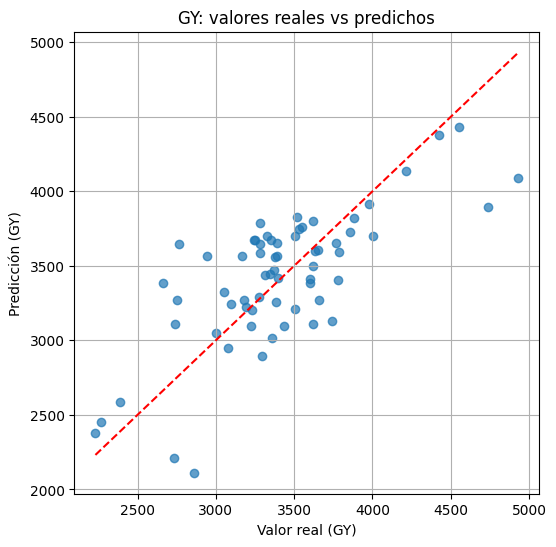

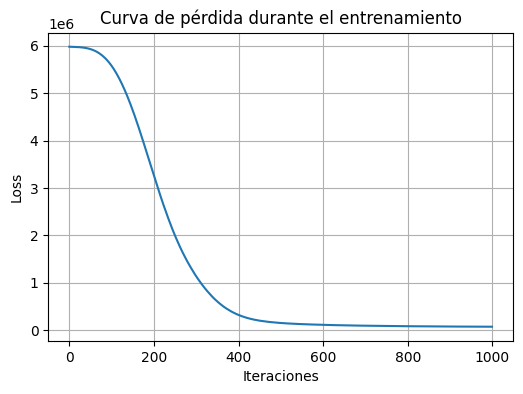

In [13]:
# ============================
# REGRESIÓN CON MLP (scikit-learn)
# ============================

#  Importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score


print("Dimensiones del dataset:", df_clean.shape)
print("Columnas:", df_clean.columns.tolist())
df_clean.head()

#  Definir variables predictoras (X) y target (y)
target = 'GY'
X = df_clean.drop(columns=[target])
y = df_clean[target]

#  Identificar variables numéricas y categóricas
cat_features = X.select_dtypes(include=['object']).columns.tolist()
num_features = X.select_dtypes(exclude=['object']).columns.tolist()

print(f"Variables categóricas: {cat_features}")
print(f"Variables numéricas: {num_features}")

#  Crear preprocesador (OneHotEncoder + RobustScaler)
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), cat_features),
        ('num', RobustScaler(), num_features)
    ]
)
#OneHotEncoder a las variables categóricas (convierte texto en variables binarias).
# RobustScaler a las numéricas (normaliza sin verse afectado por outliers).

#  Crear pipeline completo: preprocesamiento + modelo MLP
mlp = MLPRegressor(
    hidden_layer_sizes=(64, 32), #2 capas ocultas: 64 y 32 neuronas
    activation='relu', #Función de activación: ReLU.
    solver='adam', #Optimizador: Adam
    max_iter=1000, #Máximo de 1000 iteraciones.
    random_state=42
)

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('mlp', mlp)
])
# Preprocesa los datos.


#  Dividir datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

#  Entrenar el modelo
model.fit(X_train, y_train)

#  Evaluar
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
#Calcula métricas de desempeño , error promedio cuadrático y  coeficiente de determinación qué tan bien se ajusta el modelo a los datos (1.0 = perfecto)

print(f"\nError cuadrático medio (MSE): {mse:.4f}")
print(f"Coeficiente de determinación (R²): {r2:.4f}")

#  Gráfico: reales vs predichos
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Valor real (GY)")
plt.ylabel("Predicción (GY)")
plt.title("GY: valores reales vs predichos")
plt.grid(True)
plt.show()
#Si los puntos siguen la línea roja diagonal, el modelo predice bien

#  Curva de pérdida
mlp_model = model.named_steps['mlp']
plt.figure(figsize=(6,4))
plt.plot(mlp_model.loss_curve_)
plt.title("Curva de pérdida durante el entrenamiento")
plt.xlabel("Iteraciones")
plt.ylabel("Loss")
plt.grid(True)
plt.show()
#Muestra cómo disminuye la pérdida (error) durante el entrenamiento. Una curva descendente indica aprendizaje; si se estabiliza, el modelo ha convergido.

🧠 Caso base (modelo equilibrado)

MSE: 124,221.48

R²: 0.5202

➡️ El modelo logra explicar alrededor del 52% de la variabilidad, lo que sugiere un ajuste moderado: no perfecto, pero razonable.
No hay evidencia clara de sobreajuste ni subajuste en este punto.

## 2.2 Presentar un caso donde la MLP sobreajuste

Entrenando MLP con capacidad alta y pocos datos...

=== RESULTADOS DE SOBREAJUSTE ===
Entrenamiento → MSE: 21.5987 | R²: 0.9999
Prueba        → MSE: 442161.5491 | R²: -0.8440


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (3000) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning:

Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros



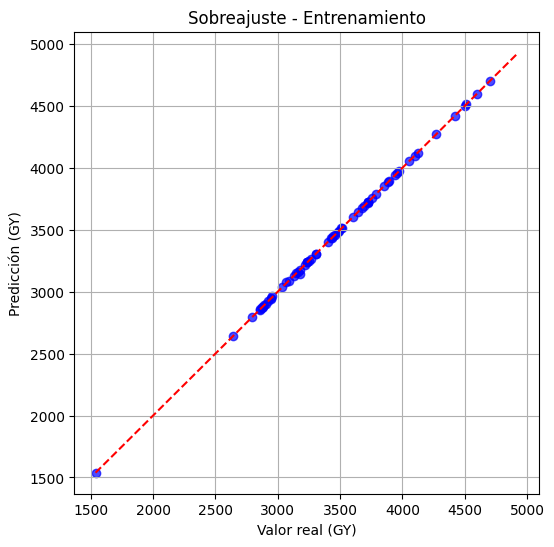

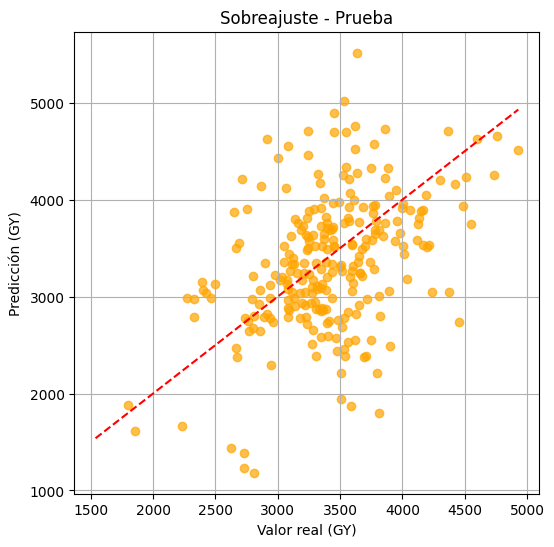

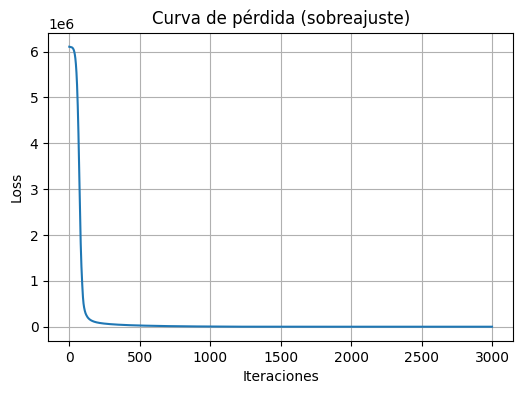

In [16]:
# ==============================
# CASO DE SOBREAJUSTE (OVERFITTING)
# ==============================

#  Dividir datos (poco entrenamiento para provocar sobreajuste)
# Sólo 20% para entrenamiento (el 80% restante es para prueba/test)
X_train_small, X_test_small, y_train_small, y_test_small = train_test_split(
    X, y, test_size=0.8, random_state=42
)

#  Crear un modelo MLP MUY grande (demasiada capacidad)
mlp_overfit = MLPRegressor(
    hidden_layer_sizes=(256, 128, 64, 32, 16),  # muchas capas y neuronas
    activation='relu',
    solver='adam',
    max_iter=3000, #3000 iteracciones
    random_state=42,
    tol=1e-5 # Tolerancia baja (tol=1e-5), para que el entrenamiento siga hasta alcanzar una pérdida muy pequeña
)

#  Crear pipeline con preprocesamiento + modelo
model_overfit = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('mlp', mlp_overfit)
])
#El Pipeline garantiza que se apliquen los mismos pasos de preprocesamiento (OneHotEncoder + escalado) en los datos de entrenamiento y prueba.

#  Entrenar
print("Entrenando MLP con capacidad alta y pocos datos...")
model_overfit.fit(X_train_small, y_train_small)
#Con tan pocos datos y tanta capacidad, el modelo va a “aprender” perfectamente los datos de entrenamiento —es decir, los memoriza.

#  Evaluar en train y test
y_train_pred = model_overfit.predict(X_train_small)
y_test_pred = model_overfit.predict(X_test_small)

# Se calculan las métricas en ambos conjuntos:
mse_train = mean_squared_error(y_train_small, y_train_pred)
mse_test = mean_squared_error(y_test_small, y_test_pred)
r2_train = r2_score(y_train_small, y_train_pred)
r2_test = r2_score(y_test_small, y_test_pred)

print("\n=== RESULTADOS DE SOBREAJUSTE ===")
print(f"Entrenamiento → MSE: {mse_train:.4f} | R²: {r2_train:.4f}")
print(f"Prueba        → MSE: {mse_test:.4f} | R²: {r2_test:.4f}")

# --- Gráficos de desempeño ---
plt.figure(figsize=(6,6))
plt.scatter(y_train_small, y_train_pred, alpha=0.7, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.title("Sobreajuste - Entrenamiento")
plt.xlabel("Valor real (GY)")
plt.ylabel("Predicción (GY)")
plt.grid(True)
plt.show()

plt.figure(figsize=(6,6))
plt.scatter(y_test_small, y_test_pred, alpha=0.7, color='orange')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.title("Sobreajuste - Prueba")
plt.xlabel("Valor real (GY)")
plt.ylabel("Predicción (GY)")
plt.grid(True)
plt.show()

#  Curva de pérdida
plt.figure(figsize=(6,4))
plt.plot(model_overfit.named_steps['mlp'].loss_curve_)
plt.title("Curva de pérdida (sobreajuste)")
plt.xlabel("Iteraciones")
plt.ylabel("Loss")
plt.grid(True)
plt.show()


El modelo es demasiado complejo para la cantidad de datos. Aprende el ruido del conjunto de entrenamiento y generaliza mal a datos nuevos. R Train2​  es alto, R Test2​  es significativamente bajo.  MSE Train bajo, MSE Test alto

## En el conjunto de entrenamiento

MSE = 21.6 → el error promedio es prácticamente nulo.

R² = 0.9999 → el modelo explica el 99.99% de la variabilidad de los datos de entrenamiento.

👉 Eso significa que el modelo ha memorizado completamente los datos que vio durante el entrenamiento.
Es decir, ajustó a la perfección los pocos puntos de entrenamiento.

## En el conjunto de prueba

MSE = 442,161.55 → el error medio cuadrático es enorme, miles de veces mayor que en entrenamiento.

R² = -0.8440 → valor negativo, lo cual es muy malo.

⚠️ Cuando R² < 0, significa que el modelo predice peor que una línea horizontal constante (es decir, peor que simplemente predecir el promedio de los valores de “GY”).

En otras palabras:

La red neuronal no aprendió a generalizar. Solo repite lo que ve en el entrenamiento y falla con datos nuevos.




---


## 2.3 Presentar un caso donde la MLP subajuste

Entrenando MLP con capacidad baja y pocas iteraciones...

=== RESULTADOS DE SUBAJUSTE ===
Entrenamiento → MSE: 11945301.7456 | R²: -46.6826
Prueba        → MSE: 11869827.1037 | R²: -44.8431


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.



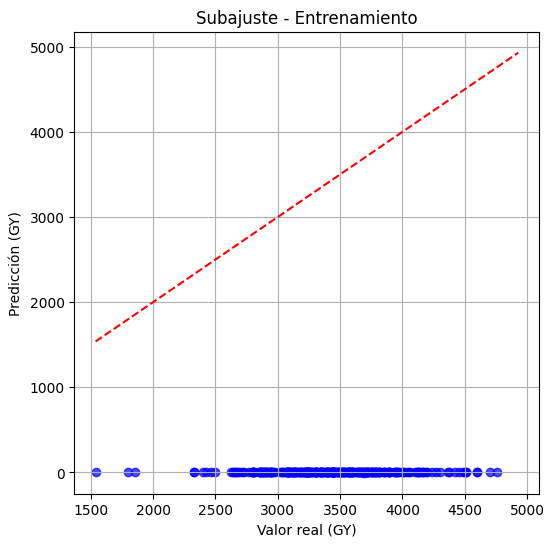

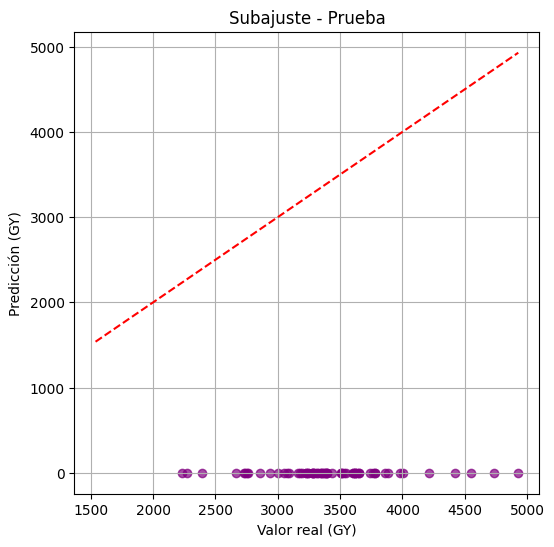

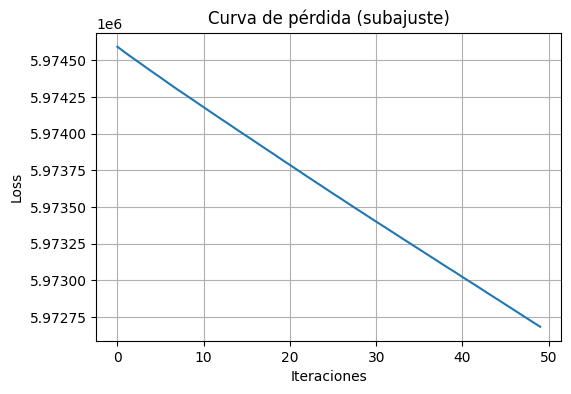

In [17]:
# ==============================
# CASO DE SUBAJUSTE (UNDERFITTING)
# ==============================

#  Dividir datos (división estándar)
# Usaremos una división estándar para que haya suficientes datos de entrenamiento
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42  # 80% entrenamiento, 20% prueba
)

#  Crear un modelo MLP MUY pequeño (poca capacidad)
# Una sola capa con muy pocas neuronas y pocas iteraciones.
mlp_underfit = MLPRegressor(
    hidden_layer_sizes=(5,),  # Solo 5 neuronas en 1 capa (baja capacidad)
    activation='relu',
    solver='adam',
    max_iter=50,              # Muy pocas iteraciones (detiene el aprendizaje pronto)
    random_state=42,
    tol=0.1                   # Mayor tolerancia para que se detenga rápidamente
)

#  Crear pipeline con preprocesamiento + modelo
model_underfit = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('mlp', mlp_underfit)
])

#  Entrenar
print("Entrenando MLP con capacidad baja y pocas iteraciones...")
model_underfit.fit(X_train, y_train) #Ajusta los parámetros del modelo a los datos de entrenamiento.
#Pero como el modelo tiene poca capacidad y pocas iteraciones,aprende solo patrones muy generales o incluso ninguno.

#  Evaluar en train y test
y_train_pred = model_underfit.predict(X_train)
y_test_pred = model_underfit.predict(X_test)

#calcula las metricas
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print("\n=== RESULTADOS DE SUBAJUSTE ===")
print(f"Entrenamiento → MSE: {mse_train:.4f} | R²: {r2_train:.4f}")
print(f"Prueba        → MSE: {mse_test:.4f} | R²: {r2_test:.4f}")

# --- Gráficos de desempeño ---
plt.figure(figsize=(6,6))
plt.scatter(y_train, y_train_pred, alpha=0.7, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.title("Subajuste - Entrenamiento")
plt.xlabel("Valor real (GY)")
plt.ylabel("Predicción (GY)")
plt.grid(True)
plt.show()

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_test_pred, alpha=0.7, color='purple')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.title("Subajuste - Prueba")
plt.xlabel("Valor real (GY)")
plt.ylabel("Predicción (GY)")
plt.grid(True)
plt.show()
#  Curva de pérdida
plt.figure(figsize=(6,4))
plt.plot(model_underfit.named_steps['mlp'].loss_curve_)
plt.title("Curva de pérdida (subajuste)")
plt.xlabel("Iteraciones")
plt.ylabel("Loss")
plt.grid(True)
plt.show()

El modelo MLP configurado con una sola capa oculta de 5 neuronas, pocas iteraciones y una alta tolerancia presentó un rendimiento deficiente tanto en entrenamiento como en prueba (MSE elevados y R² negativos).
Esto indica que el modelo tiene insuficiente capacidad y entrenamiento para capturar las relaciones existentes en los datos.
En consecuencia, las predicciones son prácticamente aleatorias o muy cercanas al promedio, sin reflejar patrones significativos.

🐢Caso de subajuste (Underfitting)
- Entrenamiento → MSE: 11,945,301.75 | R²: -46.68
- Prueba → MSE: 11,869,827.10 | R²: -44.84

➡️ El modelo tiene errores muy grandes y R² negativos tanto en entrenamiento como en prueba.
Esto demuestra que no aprendió los patrones de los datos, produciendo predicciones cercanas al promedio sin relación real con la variable objetivo.
Por lo tanto, subajusta (underfitting).





---


## 2.4 Presentar el caso donde cree que la MLP funciona de forma aceptable

Entrenando MLP con capacidad moderada y regularización...

=== RESULTADOS DE RENDIMIENTO ACEPTABLE ===
Entrenamiento → MSE: 100447.3522 | R²: 0.5990
Prueba        → MSE: 104270.3688 | R²: 0.5973
---
Diferencia de R² (Train - Test): 0.0017


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.



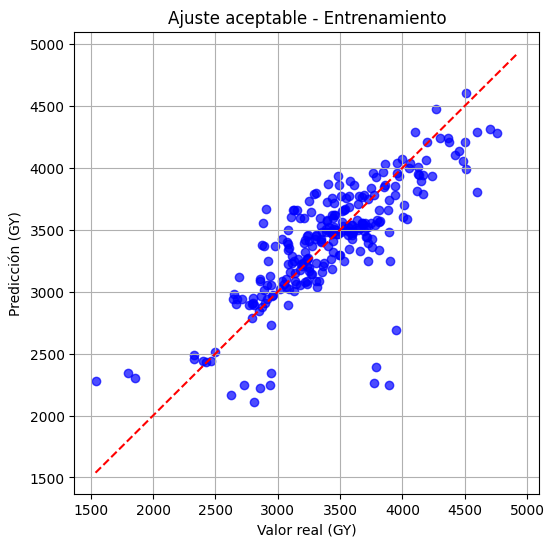

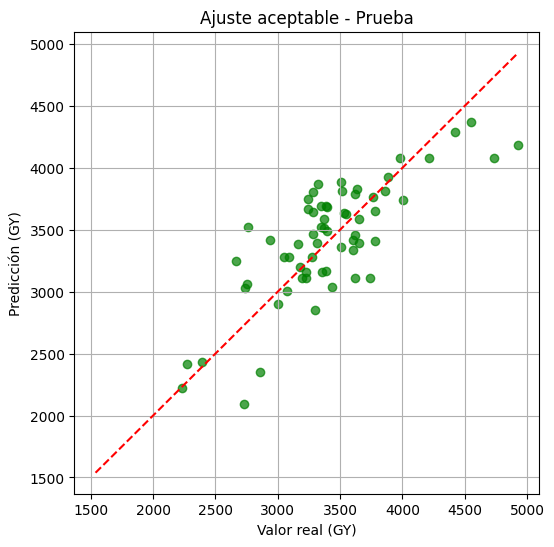

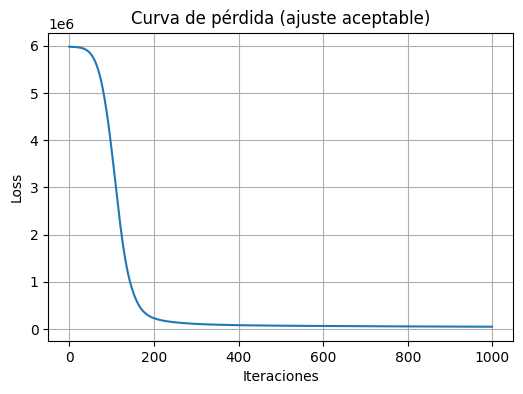

In [18]:
# ====================================
# CASO DE RENDIMIENTO ACEPTABLE (BUEN AJUSTE)
# ====================================

#  Dividir datos (división estándar)
# Usamos una división estándar para tener suficientes datos de entrenamiento y prueba.
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42  # 80% entrenamiento, 20% prueba
)

#  Crear un modelo MLP con capacidad MODERADA
mlp_balanced = MLPRegressor(
    hidden_layer_sizes=(64, 32, 16),  # 3 capas ocultas con 64, 32 y 16 neuronas → suficiente capacidad para aprender, pero no excesiva
    activation='relu',                #Función de activación ReLU, que permite modelar relaciones no lineales.
    solver='adam',
    alpha=0.001,                      # Regularización L2 para penalizar pesos y mejorar la generalización
    max_iter=1000,                    # Máximo de 1000 iteraciones: límite razonable para permitir la convergencia
    n_iter_no_change=20,              # Parada anticipada: si el score no mejora en 20 iteraciones, se detiene
    random_state=42
)

#  Crear pipeline con preprocesamiento + modelo
model_balanced = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('mlp', mlp_balanced)
])
# Combina el preprocesamiento de datos (OneHotEncoder para variables categóricas + escalado para numéricas) con el modelo neuronal MLP.
# Así, el flujo completo de datos se maneja automáticamente

#  Entrenar
print("Entrenando MLP con capacidad moderada y regularización...")
model_balanced.fit(X_train, y_train)

#  Evaluar en train y test
y_train_pred = model_balanced.predict(X_train)
y_test_pred = model_balanced.predict(X_test)

mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
#Se calcula el error y la capacidad de predicción en entrenamiento y prueba:

print("\n=== RESULTADOS DE RENDIMIENTO ACEPTABLE ===")
print(f"Entrenamiento → MSE: {mse_train:.4f} | R²: {r2_train:.4f}")
print(f"Prueba        → MSE: {mse_test:.4f} | R²: {r2_test:.4f}")
print("---")
print(f"Diferencia de R² (Train - Test): {r2_train - r2_test:.4f}")

# --- Gráficos de desempeño ---
plt.figure(figsize=(6,6))
plt.scatter(y_train, y_train_pred, alpha=0.7, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.title("Ajuste aceptable - Entrenamiento")
plt.xlabel("Valor real (GY)")
plt.ylabel("Predicción (GY)")
plt.grid(True)
plt.show()

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_test_pred, alpha=0.7, color='green')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.title("Ajuste aceptable - Prueba")
plt.xlabel("Valor real (GY)")
plt.ylabel("Predicción (GY)")
plt.grid(True)
plt.show()

#  Curva de pérdida
plt.figure(figsize=(6,4))
plt.plot(model_balanced.named_steps['mlp'].loss_curve_)
plt.title("Curva de pérdida (ajuste aceptable)")
plt.xlabel("Iteraciones")
plt.ylabel("Loss")
plt.grid(True)
plt.show()

El modelo tiene una capacidad adecuada y generaliza bien. El rendimiento en entrenamiento y prueba es similar y alto. La diferencia entre ellos es mínima, lo que indica que el modelo ha aprendido bien los patrones del entrenamiento y tiene una excelente capacidad de generalización.  R² Train ≈ R² Test,  MSE bajos y parecidos

🧠 Interpretación conceptual

El Error cuadrático medio (MSE) es relativamente bajo y similar en entrenamiento y prueba, lo que indica que el modelo no está ni sobreajustando ni subajustando.

El R² ≈ 0.6 en ambos conjuntos sugiere que el modelo explica aproximadamente el 60% de la variabilidad de la variable objetivo (GY), lo cual se considera un ajuste razonablemente bueno en contextos con datos reales (donde siempre existe ruido o variabilidad no explicada).





---


2.5 Agregue sus conclusiones comparando la experiencia y resultados del modelo de regresión lineal con el modelo del punto 2.4

Análisis Comparativo
### Rendimiento Predictivo (R2):
-  La MLP logra un R 2
  de prueba (0.5973) que es ligeramente superior al de la Regresión Lineal (0.5229). La mejora es modesta, pero indica que la MLP está capturando más variabilidad de la variable objetivo (GY).
- Ambos modelos tienen un R 2
  por debajo de 0.60, lo que sugiere que ambos modelos están subajustando en cierta medida, es decir, no están capturando completamente la complejidad de los datos (la varianza explicada sigue siendo baja).

### Precisión del Error (MSE):
- El MSE de la MLP (104270) es significativamente menor que el de la Regresión Lineal (123529), lo que significa que, en promedio, el error cuadrático de la MLP es menor. Esto confirma que la MLP es una mejor herramienta predictiva, aunque la ganancia en R 2  no sea dramática.

### Capacidad de Generalización (Diferencia R 2 ):

- Este es el punto más fuerte de la MLP. La diferencia entre R Train2​  y R
Test2​  es de solo 0.0017 para la MLP, mientras que en la Regresión Lineal es de 0.0656. Esto indica que la MLP ha logrado un equilibrio de generalización casi perfecto. La MLP no está aprendiendo el ruido y funciona casi idénticamente en datos vistos y no vistos. La Regresión Lineal, aunque simple, mostró una caída más pronunciada en la generalización.


###  Conclusión Final

El modelo de Red Neuronal MLP (con R2 ≈0.60) es el modelo superior para este dataset. Ofreciendo un balance óptimo entre precisión predictiva y capacidad de generalización, frente a la Regresión Lineal que resulta más limitada en ambos aspectos.
